In [1]:
#imports
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.impute import SimpleImputer
pd.set_option('display.max_columns', 100)

mpl.rc(group='figure', figsize=(10,8))
plt.style.use('seaborn')

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#loading train and test dataset

X_train = pd.read_csv('dengue_features_train.csv')
Y_train = pd.read_csv('dengue_labels_train.csv')
# only total_cases column
Y_train = pd.DataFrame(Y_train['total_cases'])
X_test = pd.read_csv('dengue_features_test.csv')

In [3]:
X_train.head()


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [4]:
Y_train.head()


,total_cases
0,4
1,5
2,4
3,3
4,6


In [5]:
X_test.head()


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


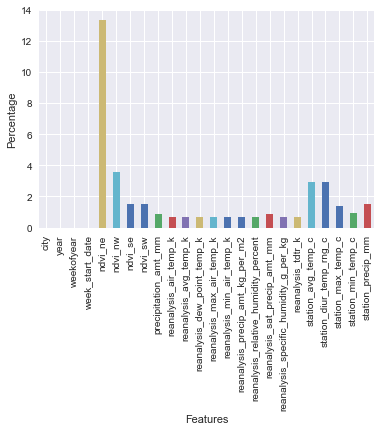

In [6]:
#Dropping features with more than 10% NaNs

null_percentages = X_train.isnull().sum()/X_train.shape[0] * 100
null_percentages.plot.bar()
plt.xlabel('Features')
plt.ylabel('Percentage')
plt.show()


In [7]:
X_train = X_train.drop('ndvi_ne',axis=1)
X_test = X_test.drop('ndvi_ne',axis=1)

In [8]:
# variable type change
X_train.week_start_date = pd.to_datetime(X_train.week_start_date)
X_test.week_start_date = pd.to_datetime(X_test.week_start_date)
# concat X and Y
XY_train = pd.concat([Y_train, X_train], axis=1)
# splitting into two cities
XY_sj = XY_train.loc[XY_train.city == 'sj', :]
XY_iq = XY_train.loc[XY_train.city == 'iq', :]

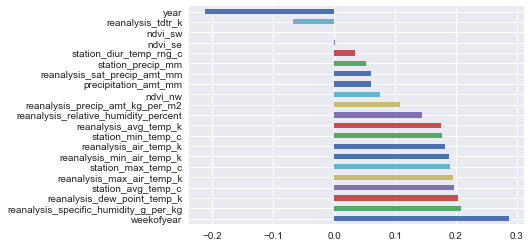

In [9]:
# correlations between total_cases and the features for San Juan

XY_sj.corr().total_cases.drop('total_cases').sort_values(ascending=False).plot.barh()


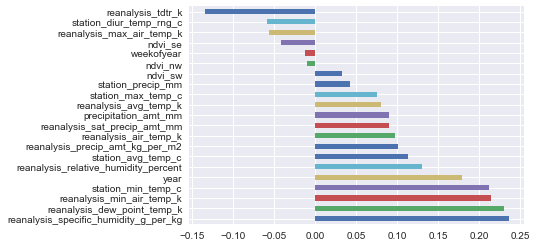

In [10]:
# Correlations between total_cases and the features for Iquitos 

XY_iq.corr().total_cases.drop('total_cases').sort_values(ascending=False).plot.barh()


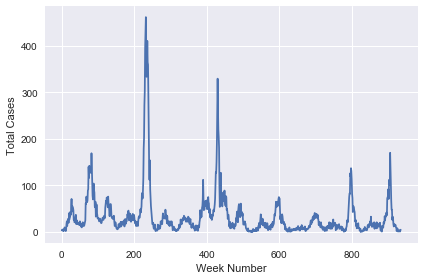

In [11]:
# San Juan - Total Cases vs Week number

XY_sj.total_cases.plot(kind='line')
plt.xlabel('Week Number')
plt.ylabel('Total Cases')
plt.tight_layout()

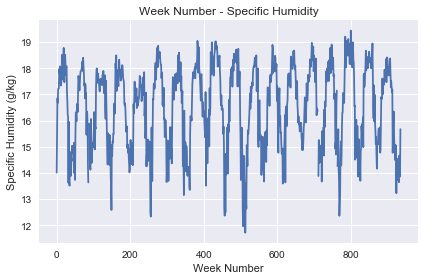

In [12]:
# Specific Humidity, Dew Point Temperature, Average/Min/Max temperature, Precipitation peak every 52 weeks (similar to total_cases)

XY_sj.reanalysis_specific_humidity_g_per_kg.plot(kind='line')
plt.title('Week Number - Specific Humidity')
plt.xlabel('Week Number')
plt.ylabel('Specific Humidity (g/kg)')
plt.tight_layout()

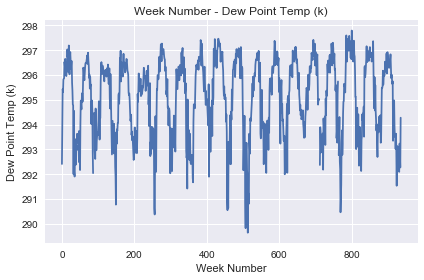

In [13]:
XY_sj.reanalysis_dew_point_temp_k.plot(kind='line')
plt.title('Week Number - Dew Point Temp (k)')
plt.xlabel('Week Number')
plt.ylabel('Dew Point Temp (k)')
plt.tight_layout()

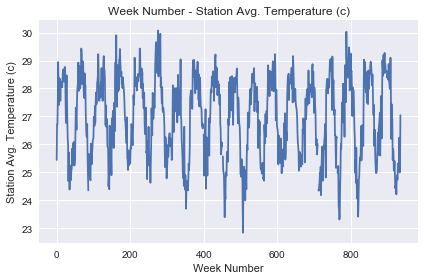

In [14]:
XY_sj.station_avg_temp_c.plot(kind='line')
plt.title('Week Number - Station Avg. Temperature (c)')
plt.xlabel('Week Number')
plt.ylabel('Station Avg. Temperature (c)')
plt.tight_layout()

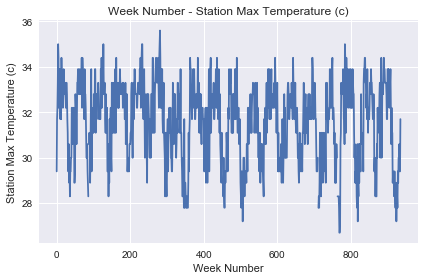

In [15]:
XY_sj.station_max_temp_c.plot(kind='line')
plt.title('Week Number - Station Max Temperature (c)')
plt.xlabel('Week Number')
plt.ylabel('Station Max Temperature (c)')
plt.tight_layout()

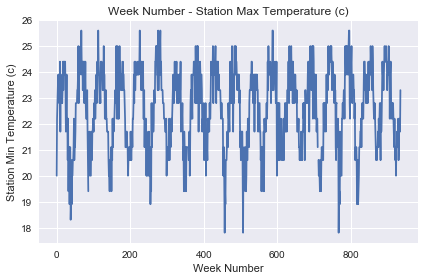

In [16]:
XY_sj.station_min_temp_c.plot(kind='line')
plt.title('Week Number - Station Max Temperature (c)')
plt.xlabel('Week Number')
plt.ylabel('Station Min Temperature (c)')
plt.tight_layout()

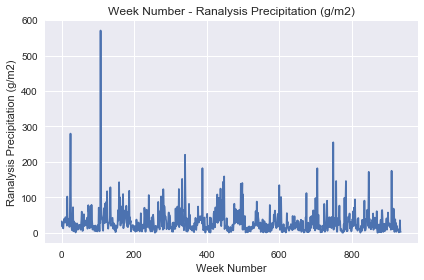

In [17]:
XY_sj.reanalysis_precip_amt_kg_per_m2.plot(kind='line')
plt.title('Week Number - Ranalysis Precipitation (g/m2)')
plt.xlabel('Week Number')
plt.ylabel('Ranalysis Precipitation (g/m2)')
plt.tight_layout()

In [18]:
X_train = X_train.reset_index()
X_test = X_test.reset_index()

In [19]:
# Split the training and test datasets according to the city

X_train_sj = X_train.loc[X_train.city == 'sj', :].copy()
X_train_iq = X_train.loc[X_train.city == 'iq', :].copy()

Y_train_sj = Y_train.loc[X_train.city == 'sj', :].copy()
Y_train_iq = Y_train.loc[X_train.city == 'iq', :].copy()

X_test_sj = X_test.loc[X_test.city == 'sj', :].copy()
X_test_iq = X_test.loc[X_test.city == 'iq', :].copy()

In [20]:
# Feature Selection

keys = ['weekofyear','city','year']

# 'ndvi_ne' has been removed, as we droped it before.
all_features = ['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm']

features = ['reanalysis_dew_point_temp_k', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_specific_humidity_g_per_kg', 
            'station_avg_temp_c',  'station_max_temp_c', 'station_min_temp_c']

new_features = ['recent_mean_dew_point', 'recent_mean_spec_humid', 'recent_sum_precip']

drop_features = list(set(all_features) - set(features) - set(keys))

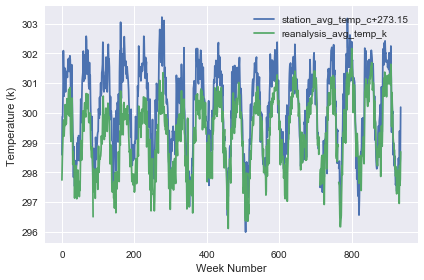

In [21]:
# Filling Missing Values - Fill using another feature with high correlation
(XY_sj.station_avg_temp_c+273.15).plot(kind='line',label="station_avg_temp_c+273.15")
XY_sj.reanalysis_avg_temp_k.plot(kind='line',label="reanalysis_avg_temp_k")
plt.xlabel('Week Number')
plt.ylabel('Temperature (k) ')
plt.legend()
plt.tight_layout()

In [22]:
#to find the missing values in station_avg/min/max_temp_c -> use other reanalysis values.
def impute_redundant_features(df):
    df['reanalysis_avg_temp_c'] = df.reanalysis_avg_temp_k - 273.15
    df.reanalysis_avg_temp_c -= (df.reanalysis_avg_temp_c - df.station_avg_temp_c).mean()
    df.loc[df.station_avg_temp_c.isnull(), 'station_avg_temp_c'] = df.reanalysis_avg_temp_c

    df['reanalysis_max_air_temp_c'] = df.reanalysis_max_air_temp_k - 273.15
    df.reanalysis_max_air_temp_c -= (df.reanalysis_max_air_temp_c - df.station_max_temp_c).mean()
    df.loc[df.station_max_temp_c.isnull(), 'station_max_temp_c'] = df.reanalysis_max_air_temp_c

    df['reanalysis_min_air_temp_c'] = df.reanalysis_min_air_temp_k - 273.15
    df.reanalysis_min_air_temp_c -= (df.reanalysis_min_air_temp_c - df.station_min_temp_c).mean()
    df.loc[df.station_min_temp_c.isnull(), 'station_min_temp_c'] = df.reanalysis_min_air_temp_c
    
    # Drop the temporary columns
    df.drop(['reanalysis_avg_temp_c', 'reanalysis_max_air_temp_c', 
                  'reanalysis_min_air_temp_c'], axis=1, inplace=True)
    
    return df

In [23]:
X_train_sj = impute_redundant_features(X_train_sj)
X_train_iq = impute_redundant_features(X_train_iq)

X_test_sj = impute_redundant_features(X_test_sj)
X_test_iq = impute_redundant_features(X_test_iq)

In [24]:
#  Fill using the mean value of the respective column

def impute_missing_values(df, imputer):
    imputer.fit(df[features])
    df[features] = imputer.transform(df[features])
    return df

In [25]:
imputer_sj = SimpleImputer(strategy='mean')
X_train_sj = impute_missing_values(X_train_sj, imputer_sj)
X_test_sj = impute_missing_values(X_test_sj, imputer_sj)

imputer_iq = SimpleImputer(strategy='mean')
X_train_iq = impute_missing_values(X_train_iq, imputer_iq)
X_test_iq = impute_missing_values(X_test_iq, imputer_iq)

In [26]:
#Create new features considering time series analysis

def add_time_series_features(df, window):
    df.set_index('week_start_date', inplace=True)

    roll_df = df.rolling(window=window, min_periods=1)
    df['recent_mean_dew_point'] = roll_df.reanalysis_dew_point_temp_k.mean()
    df['recent_mean_spec_humid'] = roll_df.reanalysis_specific_humidity_g_per_kg.mean()
    df['recent_sum_precip'] = roll_df.reanalysis_precip_amt_kg_per_m2.sum()
    
    df.reset_index(inplace=True)    
    return df

In [27]:
X_train_sj = add_time_series_features(X_train_sj, window=100)
X_train_iq = add_time_series_features(X_train_iq, window=30)
X_test_sj = add_time_series_features(X_test_sj, window=100)
X_test_iq = add_time_series_features(X_test_iq, window=30)

In [28]:
#Drop unnecessary features

def drop_unnecessary_features(df):
    df.drop(drop_features, axis=1, inplace=True)
    return df

In [29]:
X_train_sj = drop_unnecessary_features(X_train_sj)
X_train_iq = drop_unnecessary_features(X_train_iq)
X_test_sj = drop_unnecessary_features(X_test_sj)
X_test_iq = drop_unnecessary_features(X_test_iq)

In [30]:
#Normalize features

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

In [31]:
features_to_normalize = features + new_features

X_train_sj[features_to_normalize] = X_train_sj[features_to_normalize].apply(normalize, axis=0)
X_train_iq[features_to_normalize] = X_train_iq[features_to_normalize].apply(normalize, axis=0)
X_test_sj[features_to_normalize] = X_test_sj[features_to_normalize].apply(normalize, axis=0)
X_test_iq[features_to_normalize] = X_test_iq[features_to_normalize].apply(normalize, axis=0)

In [32]:
#Combine two datasets and restore to original values

X_train = pd.concat([X_train_sj, X_train_iq], axis=0)
X_train.set_index('index', inplace=True)
X_train.head()

,city,year,weekofyear,reanalysis_dew_point_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_max_temp_c,station_min_temp_c,recent_mean_dew_point,recent_mean_spec_humid,recent_sum_precip
index,,,,,,,,,,,,
0,sj,1990,18,-1.722306,0.043211,-1.632200,-1.108260,-1.289862,-1.732105,-9.463572,-8.929043,-3.733679
1,sj,1990,19,-0.740042,-0.352694,-0.758112,-0.207129,0.053770,-0.266841,-6.794441,-6.566003,-3.710537
2,sj,1990,20,0.207532,-0.122923,0.190347,-0.207129,0.345864,0.132776,-4.188151,-4.068925,-3.676869
3,sj,1990,21,0.128111,-0.466453,0.077414,0.329500,0.988471,0.465791,-2.992913,-2.973040,-3.658939
4,sj,1990,22,0.454924,-0.514322,0.422642,1.372383,1.981591,0.865408,-1.920547,-1.942189,-3.643202


In [33]:
#Split train dataset according to the city

X_sj, Y_sj = X_train.loc[X_train.city == 'sj', :], Y_train.loc[X_train.city == 'sj', :]
X_iq, Y_iq = X_train.loc[X_train.city == 'iq', :], Y_train.loc[X_train.city == 'iq', :]

In [34]:
#Split into training and cross validation sets

X_train_sj, X_cross_sj, Y_train_sj, Y_cross_sj = train_test_split(X_sj, Y_sj, test_size=0.2, stratify=X_sj.weekofyear)

X_train_iq, X_cross_iq, Y_train_iq, Y_cross_iq = train_test_split(X_iq, Y_iq, test_size=0.2, stratify=X_iq.weekofyear)


In [35]:
#Drop 'city' again

X_train_sj = X_train_sj.drop(['city','year'],axis=1)
X_train_iq = X_train_iq.drop(['city','year'],axis=1)
X_cross_sj = X_cross_sj.drop(['city','year'],axis=1)
X_cross_iq = X_cross_iq.drop(['city','year'],axis=1)

In [36]:
#Baseline - Dummy Regressor

def train_predict_score(reg, X, Y):
    reg.fit(X, Y)
    Y_pred = reg.predict(X)
    return mean_absolute_error(y_true=Y, y_pred=Y_pred)

In [37]:
reg = DummyRegressor(strategy='mean')
print('San Juan: ', round(train_predict_score(reg, X_train_sj, Y_train_sj), 4))
print('Iquitos: ', round(train_predict_score(reg, X_train_iq, Y_train_iq), 4))

San Juan:  28.38
Iquitos:  6.3939


In [38]:
#Different Regression Models

def train_cross_val_score(reg, X, Y, scoring='neg_mean_absolute_error'):
    reg.fit(X, Y)
    scores = np.abs(cross_val_score(reg, X, Y, scoring=scoring))
    print("Scores: {}".format(scores))
    print("Avg Score: {}".format(scores.mean()))

In [39]:
#Linear Regression

reg = LinearRegression(n_jobs=-1)
print('San Juan:', train_cross_val_score(reg, X_train_sj, Y_train_sj))
print('Iquitos:', train_cross_val_score(reg, X_train_iq, Y_train_iq))

Scores: [27.19739704 25.67800917 29.14696443 32.41551193 25.55345965]
Avg Score: 27.998268445516107
San Juan: None
Scores: [6.54481576 6.67601654 5.90360798 5.42457497 6.14697997]
Avg Score: 6.139199045604393
Iquitos: None


In [40]:
#KNN - K-Nearest Neighbors

reg = KNeighborsRegressor(n_jobs=-1)
print('San Juan:', train_cross_val_score(reg, X_train_sj, Y_train_sj))
print('\nIquitos:' , train_cross_val_score(reg, X_train_iq, Y_train_iq))

Scores: [25.27866667 24.77866667 25.18       29.11812081 25.26174497]
Avg Score: 25.92343982102908
San Juan: None
Scores: [6.82619048 6.77590361 6.35662651 5.         6.10843373]
Avg Score: 6.213430866322432

Iquitos: None


In [41]:
#SVR - Support Vector Regressor (kernel - linear)

reg = SVR(kernel='linear')
print('San Juan:', train_cross_val_score(reg, X_train_sj, Y_train_sj.total_cases))
print('\nIquitos:', train_cross_val_score(reg, X_train_iq, Y_train_iq.total_cases))

Scores: [21.1733131  19.76514817 27.75386902 29.87115548 17.88808492]
Avg Score: 23.290314137227302
San Juan: None
Scores: [6.49772953 5.46117512 4.49897748 4.35543506 6.23832233]
Avg Score: 5.410327903986191

Iquitos: None


In [42]:
#SVR - Support Vector Regressor (kernel - rbf)

reg = SVR(kernel='rbf')
print('San Juan:', train_cross_val_score(reg, X_train_sj, Y_train_sj.total_cases))
print('\nIquitos:', train_cross_val_score(reg, X_train_iq, Y_train_iq.total_cases))

Scores: [20.16330412 18.81011331 27.2507764  28.82406839 16.72024668]
Avg Score: 22.353701779336284
San Juan: None
Scores: [6.67613842 5.77990697 4.5229351  4.4019132  6.15766903]
Avg Score: 5.507712543213625

Iquitos: None


In [43]:
#Gradient Boosting

reg = GradientBoostingRegressor(criterion='mae', random_state=67)
print('San Juan:', train_cross_val_score(reg, X_train_sj, Y_train_sj.total_cases))
print('\nIquitos:', train_cross_val_score(reg, X_train_iq, Y_train_iq.total_cases))

Scores: [20.55391514 17.08495928 21.37403952 22.03083884 14.78747408]
Avg Score: 19.1662453732488
San Juan: None
Scores: [6.19941278 5.35981695 5.20251242 4.72126328 5.61570354]
Avg Score: 5.419741793074886

Iquitos: None


In [44]:
#Random Forest Regressor

reg = RandomForestRegressor(criterion='mae', n_jobs=-1, random_state=67, n_estimators=1000)
print('San Juan:', train_cross_val_score(reg, X_train_sj, Y_train_sj.total_cases))
print('\nIquitos:', train_cross_val_score(reg, X_train_iq, Y_train_iq.total_cases))

Scores: [19.12301333 17.31256667 17.57523    20.64897987 15.42205369]
Avg Score: 18.016368711409395
San Juan: None
Scores: [6.50227381 5.6283253  5.45037952 4.95186145 5.41015663]
Avg Score: 5.588599340218015

Iquitos: None


In [45]:
#Grid Search to determine best hyper parameters of selected models for two cities from above cross validation scores

def grid_search_cross_val(reg, X, Y, param_grid, scoring='neg_mean_absolute_error'):
    grid = GridSearchCV(reg, param_grid=param_grid, scoring=scoring)
    grid.fit(X, Y)
    print("Best score: {}".format(np.abs(grid.best_score_)))
    print("Best params: {}".format(grid.best_params_))

In [47]:
#Gradient Boosting - for both cities

%time
reg = GradientBoostingRegressor(random_state=67)

param_grid = [
    {'learning_rate': [0.1, 0.3, 1.0, 3.0], 'n_estimators': [10, 30, 100, 300, 500], 
     'max_depth': [3, 5, 7, 9]}
]

print("San Juan:", grid_search_cross_val(reg, X_train_sj, Y_train_sj.total_cases, param_grid))
print("\nIquitos", grid_search_cross_val(reg, X_train_iq, Y_train_iq.total_cases, param_grid))

Wall time: 0 ns
Best score: 16.28501595863012
Best params: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
San Juan: None
Best score: 5.175795422854333
Best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

Iquitos None


In [48]:
# Random Forest - for both cities

%time
reg = RandomForestRegressor(random_state=67)

param_grid = [
    {
      'n_estimators': [10, 30, 100, 300, 500, 1000], 
      'max_depth': [3, 5, 7, None]
    } 
]

print("San Juan", grid_search_cross_val(reg, X_train_sj, Y_train_sj.total_cases, param_grid))
print("\nIquitos", grid_search_cross_val(reg, X_train_iq, Y_train_iq.total_cases, param_grid))

Wall time: 0 ns
Best score: 17.51603210738255
Best params: {'max_depth': None, 'n_estimators': 500}
San Juan None
Best score: 5.4785028388003925
Best params: {'max_depth': 7, 'n_estimators': 30}

Iquitos None


In [49]:
#SVR - linear - for Iquitos

reg = SVR(kernel='linear')

param_grid = [
    {
        'C': [1, 3, 10, 20],
        'gamma': [0.001, 0.003, 0.01, 1.0]
    }
]

print("Iquitos:", grid_search_cross_val(reg, X_train_iq, Y_train_iq.total_cases, param_grid))

Best score: 5.347723256793593
Best params: {'C': 20, 'gamma': 0.001}
Iquitos: None


In [50]:
#SVR - rbf - for Iquitos

reg = SVR(kernel='rbf')

param_grid = [
    {
        'C': [1, 3, 10, 20],
        'gamma': [0.001, 0.003, 0.01, 1.0]
    }
]

print("Iquitos:", grid_search_cross_val(reg, X_train_iq, Y_train_iq.total_cases, param_grid))

Best score: 5.042857713862063
Best params: {'C': 20, 'gamma': 0.003}
Iquitos: None


In [51]:
#Based on above Grid Search - Select,
#Gradient Boosting for San Juan 
#SVR - rbf kernel for Iquitos

#Droping columns

predict_sj = X_test_sj[keys]
predict_iq = X_test_iq[keys]

X_sj.drop(['city','year','weekofyear'],axis=1,inplace=True)
X_iq.drop(['city','year','weekofyear'],axis=1,inplace=True)
X_test_sj.drop(['city','year','weekofyear','index'],axis=1,inplace=True)
X_test_iq.drop(['city','year','weekofyear','index'],axis=1,inplace=True)

In [52]:
#Train using whole dataset

reg_sj = GradientBoostingRegressor(learning_rate=0.1, max_depth=7, n_estimators=100, random_state=67)
reg_sj.fit(X_sj, Y_sj.total_cases)

GradientBoostingRegressor(max_depth=7, random_state=67)

In [53]:
reg_iq = SVR(kernel='rbf', C=20, gamma=0.003)
reg_iq.fit(X_iq, Y_iq.total_cases)

SVR(C=20, gamma=0.003)

In [54]:
Y_sj_pred = reg_sj.predict(X_test_sj)
predict_sj['total_cases'] = Y_sj_pred.round().astype(int)
predict_sj.head()

,weekofyear,city,year,total_cases
0,18,sj,2008,31
1,19,sj,2008,33
2,20,sj,2008,20
3,21,sj,2008,20
4,22,sj,2008,17


In [55]:
Y_iq_pred = reg_iq.predict(X_test_iq)
predict_iq['total_cases'] = Y_iq_pred.round().astype(int)
predict_iq.head()

,weekofyear,city,year,total_cases
0,26,iq,2010,10
1,27,iq,2010,6
2,28,iq,2010,9
3,29,iq,2010,4
4,30,iq,2010,3


In [56]:
predict_df = pd.concat([predict_sj, predict_iq], axis=0)

In [57]:
predict_df[predict_df.total_cases < 0]

,weekofyear,city,year,total_cases


In [58]:
predict_df.loc[predict_df.total_cases < 0, 'total_cases'] = 0


In [59]:
S = pd.read_csv('submission_format.csv')

S['total_cases'] = predict_df['total_cases'].values

S

S.to_csv('final_multimodel.csv', index=False)

In [60]:
predict_df['total_cases']

0      31
1      33
2      20
3      20
4      17
5      21
6      26
7      31
8      33
9      11
10      8
11     12
12     72
13     25
14     23
15     25
16     28
17     25
18     30
19     21
20     25
21     22
22     53
23     31
24     34
25     42
26     23
27     23
28     26
29     20
       ..
126     6
127     5
128     5
129     6
130     5
131     3
132     3
133     5
134     5
135     6
136     6
137     6
138     6
139     6
140     8
141     9
142     8
143     8
144     7
145     9
146     8
147     6
148     8
149     8
150     7
151     7
152     7
153     6
154     4
155     5
Name: total_cases, Length: 416, dtype: int32